In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

import os

In [2]:
os.chdir('..')
df = pd.read_csv("Datasets/Pakistan Covid Dataset/PK COVID-19-3jun.csv")

In [3]:
df.head(20)

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
5,3/6/2020,0,0,1,Unknown,Sindh,Karachi
6,3/7/2020,1,0,0,Iran/Taftan,Sindh,Karachi
7,3/9/2020,6,0,0,Syria,Sindh,Karachi
8,3/9/2020,3,0,0,UK,Sindh,Karachi
9,3/10/2020,1,0,0,Iran/Taftan,Baluchistan,Quetta


In [4]:
df.shape

(2798, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            2798 non-null   object
 1   Cases           2798 non-null   int64 
 2   Deaths          2798 non-null   int64 
 3   Recovered       2798 non-null   int64 
 4   Travel_history  2762 non-null   object
 5   Province        2798 non-null   object
 6   City            2798 non-null   object
dtypes: int64(3), object(4)
memory usage: 153.1+ KB


In [6]:
dfmissing = df[pd.isnull(df.Travel_history)]
dfmissing.head(10)

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
2762,5/17/2020,148,0,37,NaN,Baluchistan,Quetta
2763,5/18/2020,128,2,70,NaN,Baluchistan,Quetta
2764,5/19/2020,65,0,84,NaN,Baluchistan,Quetta
2765,5/20/2020,83,0,28,NaN,Baluchistan,Quetta
2766,5/21/2020,106,1,88,NaN,Baluchistan,Quetta
2767,5/22/2020,124,0,38,NaN,Baluchistan,Quetta
2768,5/23/2020,108,0,98,NaN,Baluchistan,Quetta
2769,5/24/2020,101,1,15,NaN,Baluchistan,Quetta
2770,5/25/2020,61,1,118,NaN,Baluchistan,Quetta
2771,5/26/2020,68,0,163,NaN,Baluchistan,Quetta


In [7]:
df['Cases'].describe()

count    2798.000000
mean       30.016440
std       128.861666
min         0.000000
25%         0.000000
50%         2.000000
75%         9.000000
max      1639.000000
Name: Cases, dtype: float64

In [8]:
df['Deaths'].describe()

count    2798.000000
mean        0.617584
std         2.716284
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        43.000000
Name: Deaths, dtype: float64

In [9]:
df['Recovered'].describe()

count    2798.000000
mean        8.847034
std        61.362566
min        -2.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      1431.000000
Name: Recovered, dtype: float64

In [10]:
df = df[df['Recovered'] >= 0]

In [11]:
df['Recovered'].describe()

count    2795.000000
mean        8.857961
std        61.394591
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      1431.000000
Name: Recovered, dtype: float64

In [12]:
df.shape

(2795, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2795 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            2795 non-null   object
 1   Cases           2795 non-null   int64 
 2   Deaths          2795 non-null   int64 
 3   Recovered       2795 non-null   int64 
 4   Travel_history  2759 non-null   object
 5   Province        2795 non-null   object
 6   City            2795 non-null   object
dtypes: int64(3), object(4)
memory usage: 174.7+ KB


In [14]:
df['Province'].unique()

array(['Islamabad Capital Territory', 'Sindh', 'Gilgit-Baltistan',
       'Baluchistan', 'Punjab', 'Khyber Pakhtunkhwa',
       'khyber Pakhtunkhwa', 'Azad Jummu Kashmir',
       'Federal Administration Tribal Area',
       'islamabad Capital Territory'], dtype=object)

In [15]:
df['Province'] = df['Province'].replace(['islamabad Capital Territory', 'khyber Pakhtunkhwa', 'Federal Administration Tribal Area'], ['Islamabad Capital Territory', 'Khyber Pakhtunkhwa', 'FATA', ])

In [16]:
df['Province'].unique()

array(['Islamabad Capital Territory', 'Sindh', 'Gilgit-Baltistan',
       'Baluchistan', 'Punjab', 'Khyber Pakhtunkhwa',
       'Azad Jummu Kashmir', 'FATA'], dtype=object)

In [17]:
df.shape

(2795, 7)

In [18]:
df.columns

Index(['Date', 'Cases', 'Deaths', 'Recovered', 'Travel_history', 'Province',
       'City'],
      dtype='object')

In [19]:
print(df.Travel_history.unique())
print(df.Date.nunique())
print(df.City.unique())

['China' 'Iran/Taftan' 'Unknown' 'Syria' 'UK' 'Local - Social Contact'
 'USA' 'KSA' 'Local - Covid Relative' 'Dubai' 'International Passenger'
 'Tableeghi Jamaat' 'Jail' 'Afghanistan' 'India' nan]
91
['Islamabad' 'Karachi' 'Gilgit' 'Quetta' 'Hyderabad' 'Skardu' 'Taftan'
 'Lahore' 'Sukkur' 'Dera Ismail Khan' 'Mardan' 'Mansehra' 'Peshawar'
 'Charsadda' 'Dera Ghazi Khan' 'Mirpur' 'Buner' 'Mardan ' 'Hangu ' 'Nagar'
 'Multan' 'Khyber' 'Rawalpindi' 'Jehlum' 'Gujrat ' 'Karak' 'Gujranwala'
 'Dadu' 'South Waziristan' 'Sargodha' 'Faisalabad' 'Mandi Bahauddin'
 'Rahim yar khan' 'Astore' 'Kharmang' 'Swabi' 'Gujrat' 'Dir Upper' 'Swat'
 'Mianwali' 'Narowal' 'Nankana' 'Attock' 'Bahawal Nagar' 'Shigar'
 'Shangla' 'Nowshera' 'Orakzai' 'Malakand' 'Kohat' 'Larkana' 'Dir Lower'
 'Abbottabad' 'Khushab' 'Vehari' 'Raiwind' 'Muzaffarabad' 'Ghanche'
 'Bahawalpur' 'Rahim Yar Khan' 'Bajaur' 'Bannu' 'Kurrum' 'Haripur'
 'Hafizabad' 'Kasur' 'Laiya' 'Jacobabad' 'Bhambore ' 'Trarkhel' 'Tank'
 'Lodhran' 'Sialkot' 'Han

In [20]:
array = np.array(df.City.unique())
d = {"City": array}

Cities = pd.DataFrame(data=d, dtype=str)
Cities['City'] = Cities['City'].str.strip()
Cities['City'] = Cities["City"].str.lower()
Cities["City"].drop_duplicates(inplace=True)
Cities.City.unique()

array(['islamabad', 'karachi', 'gilgit', 'quetta', 'hyderabad', 'skardu',
       'taftan', 'lahore', 'sukkur', 'dera ismail khan', 'mardan',
       'mansehra', 'peshawar', 'charsadda', 'dera ghazi khan', 'mirpur',
       'buner', 'hangu', 'nagar', 'multan', 'khyber', 'rawalpindi',
       'jehlum', 'gujrat', 'karak', 'gujranwala', 'dadu',
       'south waziristan', 'sargodha', 'faisalabad', 'mandi bahauddin',
       'rahim yar khan', 'astore', 'kharmang', 'swabi', 'dir upper',
       'swat', 'mianwali', 'narowal', 'nankana', 'attock',
       'bahawal nagar', 'shigar', 'shangla', 'nowshera', 'orakzai',
       'malakand', 'kohat', 'larkana', 'dir lower', 'abbottabad',
       'khushab', 'vehari', 'raiwind', 'muzaffarabad', 'ghanche',
       'bahawalpur', 'bajaur', 'bannu', 'kurrum', 'haripur', 'hafizabad',
       'kasur', 'laiya', 'jacobabad', 'bhambore', 'trarkhel', 'tank',
       'lodhran', 'sialkot', 'chiniot', 'sheikhupura', 'lakki marwat',
       'torghar', 'north waziristan', 'mohman

In [21]:
df["City"] = df["City"].str.strip()
df["City"] = df["City"].str.lower()
df['City'] = df["City"].str.replace(" ", "")
df["City"].drop_duplicates()
df['City'] = df['City'].replace(['kolaipllas', 'tandoalahyar', 'diraismailkhan'], ['kolaipallas', 'tandoallahyar', 'deraismailkhan'])

In [22]:
df['City'].nunique()

119

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.duplicated().sum()

2

In [25]:
df[df.duplicated()]

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
1160,2020-05-01,0,0,1,Local - Social Contact,Gilgit-Baltistan,gilgit
1560,2020-05-13,1,0,0,Local - Social Contact,Gilgit-Baltistan,ghizer


In [26]:
df.shape

(2795, 7)

In [27]:
df = df.drop_duplicates(keep='first')
df.shape

(2793, 7)

In [28]:
df_cdr_date = df[['Cases', 'Deaths', 'Recovered']].groupby(df['Date']).sum().reset_index()
df_cdr_province = df[['Cases', 'Deaths', 'Recovered']].groupby(df['Province']).sum().reset_index()
df_cdr_city = df[['Cases', 'Deaths', 'Recovered']].groupby(df['City']).sum().reset_index()
df_cdr_travel_history = df[['Cases', 'Deaths', 'Recovered']].groupby(df['Travel_history']).sum().reset_index()

# Visualizations

<Axes: xlabel='Recovered'>

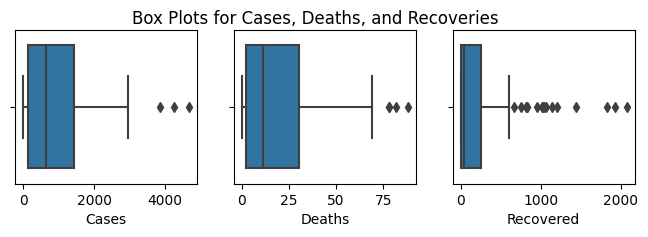

In [29]:
fig,axes = plt.subplots(1, 3, figsize=(8, 2))
fig.suptitle("Box Plots for Cases, Deaths, and Recoveries")

sns.boxplot(ax=axes[0], data=df_cdr_date, x='Cases')
sns.boxplot(ax=axes[1], data=df_cdr_date, x='Deaths')
sns.boxplot(ax=axes[2], data=df_cdr_date, x='Recovered')

<Axes: xlabel='Date', ylabel='Recovered'>

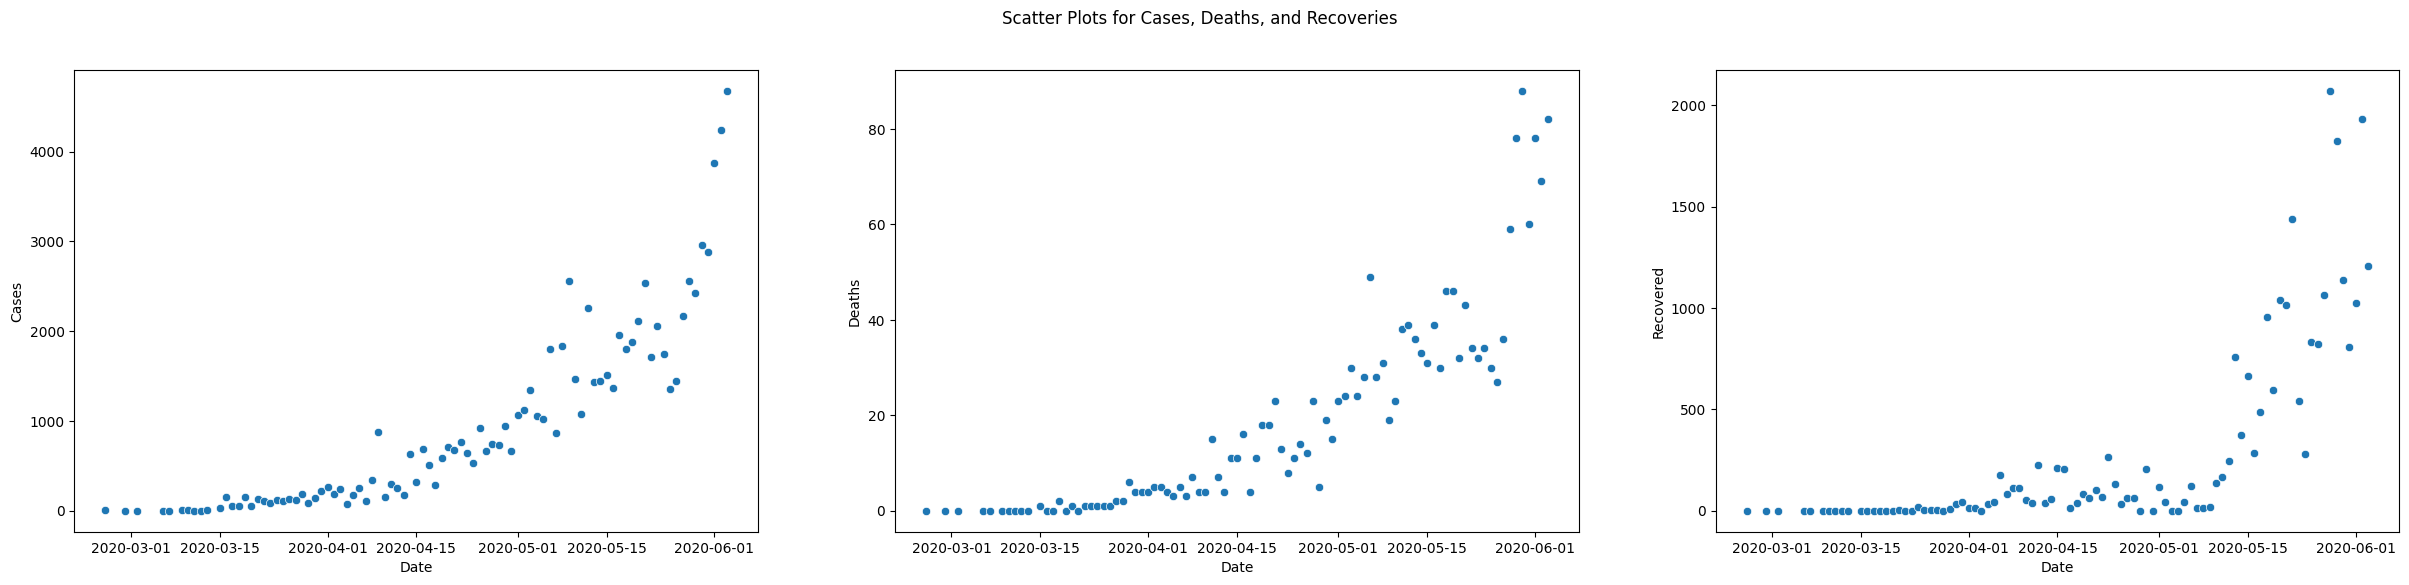

In [30]:
fig,axes = plt.subplots(1, 3, figsize=(30, 6))
fig.suptitle("Scatter Plots for Cases, Deaths, and Recoveries")

sns.scatterplot(ax=axes[0], data=df_cdr_date, y='Cases', x='Date')
sns.scatterplot(ax=axes[1], data=df_cdr_date, y='Deaths', x='Date')
sns.scatterplot(ax=axes[2], data=df_cdr_date, y='Recovered', x='Date')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2793 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2793 non-null   datetime64[ns]
 1   Cases           2793 non-null   int64         
 2   Deaths          2793 non-null   int64         
 3   Recovered       2793 non-null   int64         
 4   Travel_history  2757 non-null   object        
 5   Province        2793 non-null   object        
 6   City            2793 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 174.6+ KB


<Axes: xlabel='Province', ylabel='Recovered'>

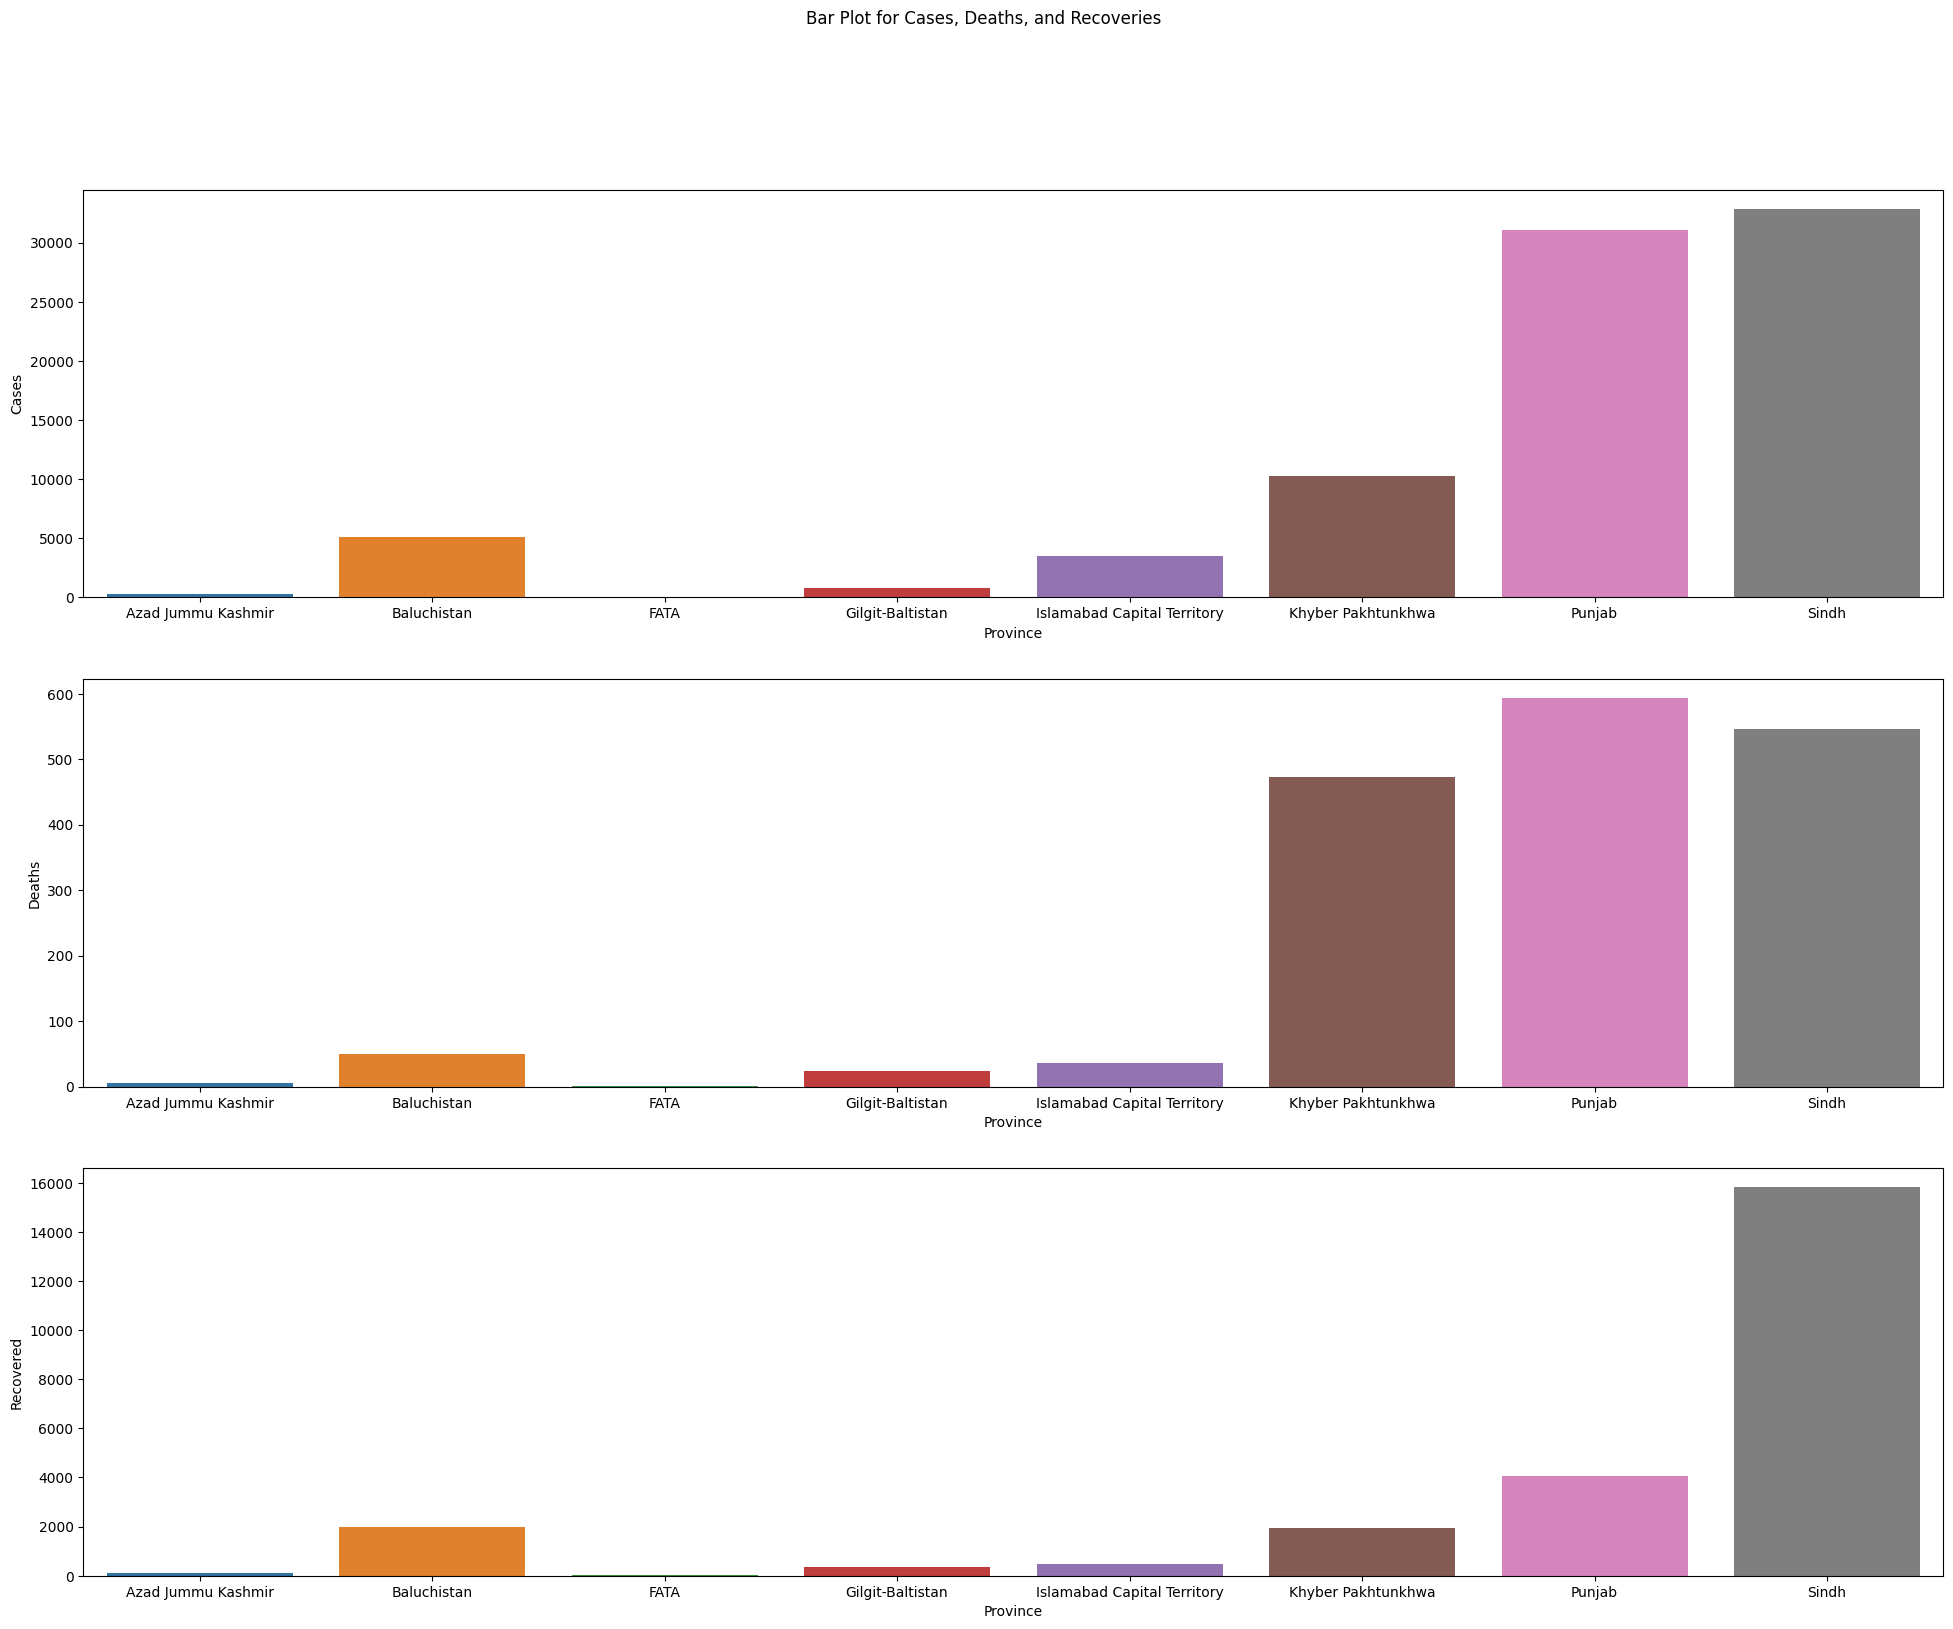

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(24, 18))
fig.suptitle("Bar Plot for Cases, Deaths, and Recoveries")

sns.barplot(ax=axes[0], data=df_cdr_province, y='Cases', x='Province')
sns.barplot(ax=axes[1], data=df_cdr_province, y='Deaths', x='Province')
sns.barplot(ax=axes[2], data=df_cdr_province, y='Recovered', x='Province')

<Axes: xlabel='City', ylabel='Recovered'>

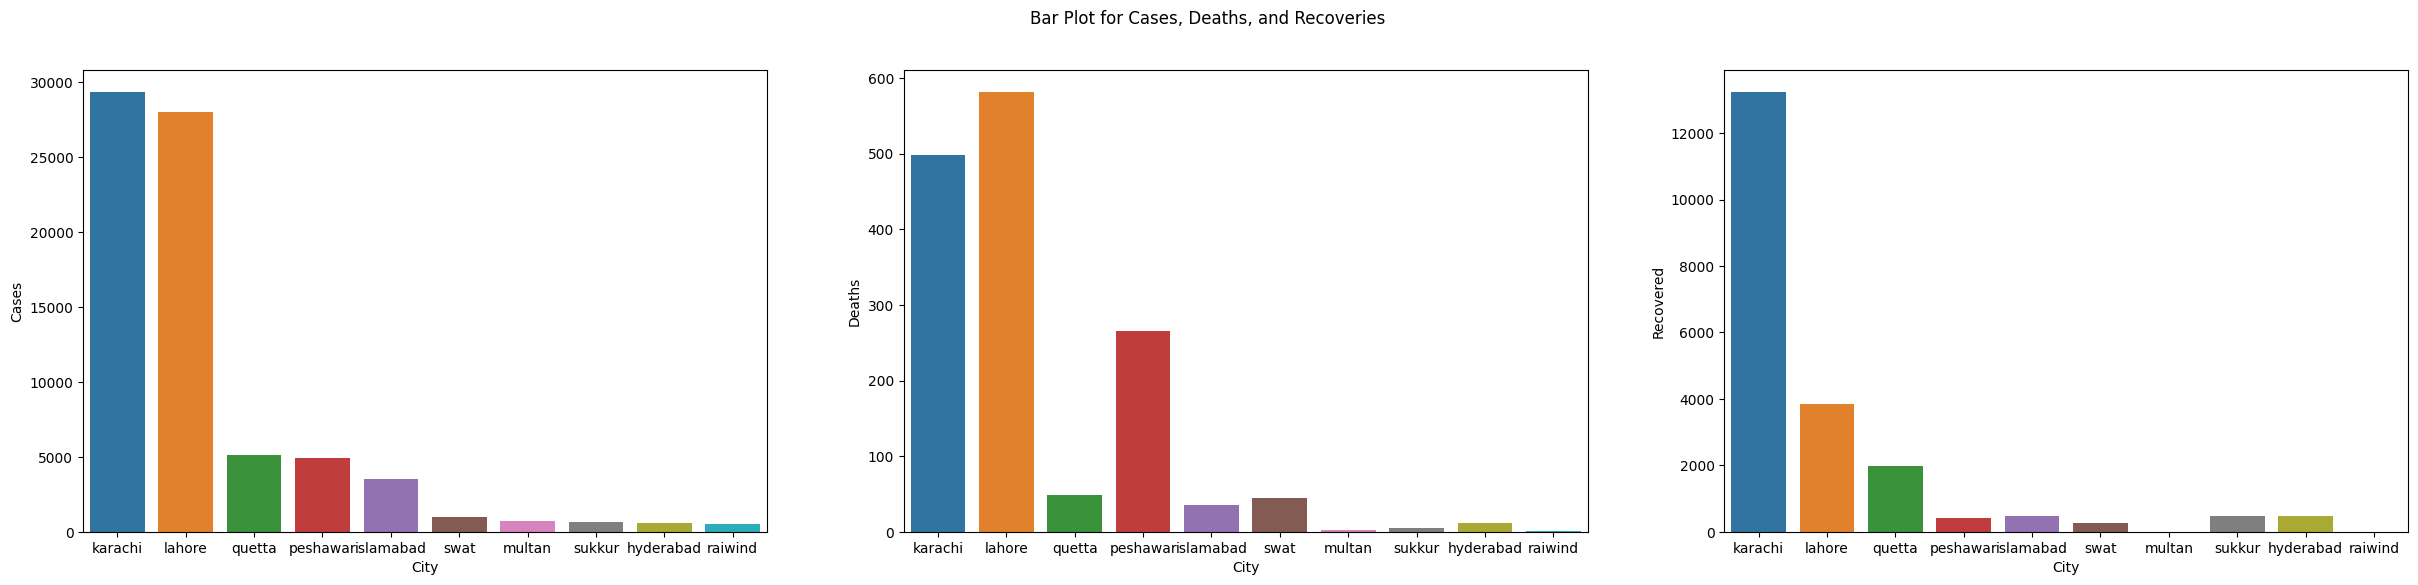

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(30, 6))
fig.suptitle("Bar Plot for Cases, Deaths, and Recoveries")
Top_Cases_Cities = df_cdr_city.sort_values('Cases', ascending=False).head(10)

sns.barplot(ax=axes[0], y=Top_Cases_Cities['Cases'], x=Top_Cases_Cities['City'])
sns.barplot(ax=axes[1], y=Top_Cases_Cities['Deaths'], x=Top_Cases_Cities['City'])
sns.barplot(ax=axes[2], y=Top_Cases_Cities['Recovered'], x=Top_Cases_Cities['City'])

<Axes: xlabel='Travel_history', ylabel='Recovered'>

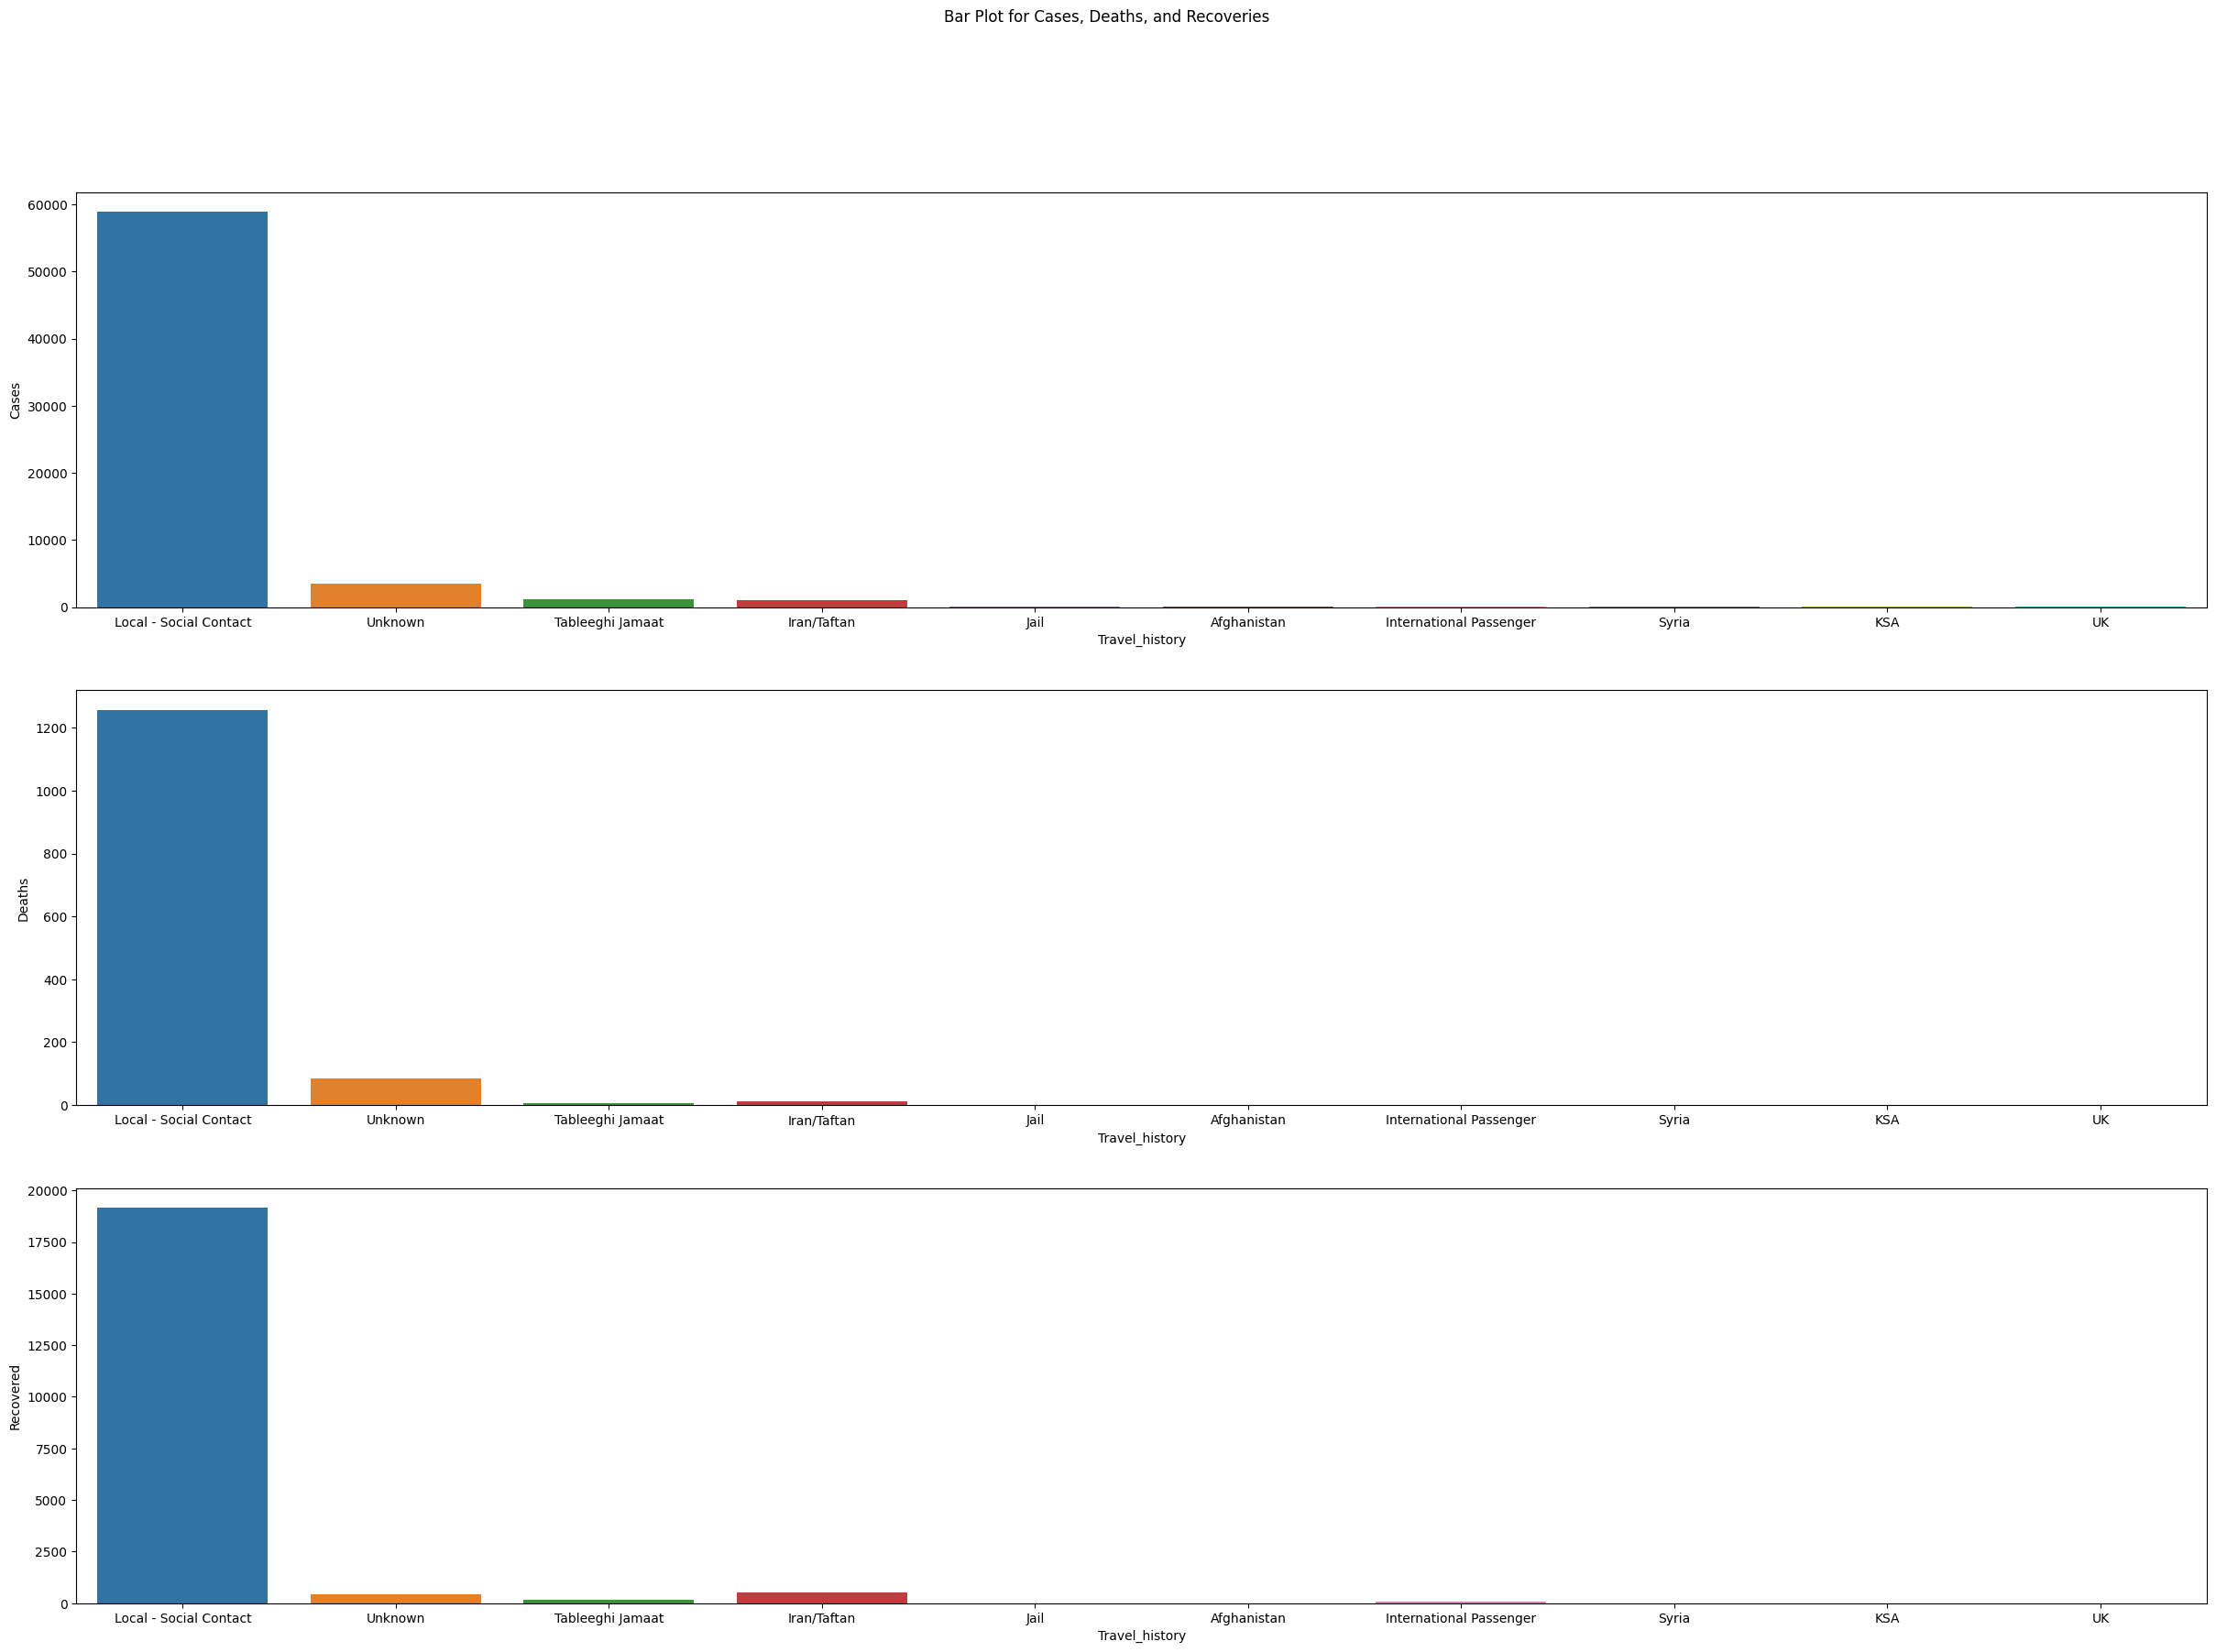

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(30, 20))
fig.suptitle("Bar Plot for Cases, Deaths, and Recoveries")
Top_Cases_Travel_History = df_cdr_travel_history.sort_values('Cases', ascending=False).head(10)

sns.barplot(ax=axes[0], y=Top_Cases_Travel_History['Cases'], x=Top_Cases_Travel_History['Travel_history'])
sns.barplot(ax=axes[1], y=Top_Cases_Travel_History['Deaths'], x=Top_Cases_Travel_History['Travel_history'])
sns.barplot(ax=axes[2], y=Top_Cases_Travel_History['Recovered'], x=Top_Cases_Travel_History['Travel_history'])

C:\Users\Zaviyar Zahid\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


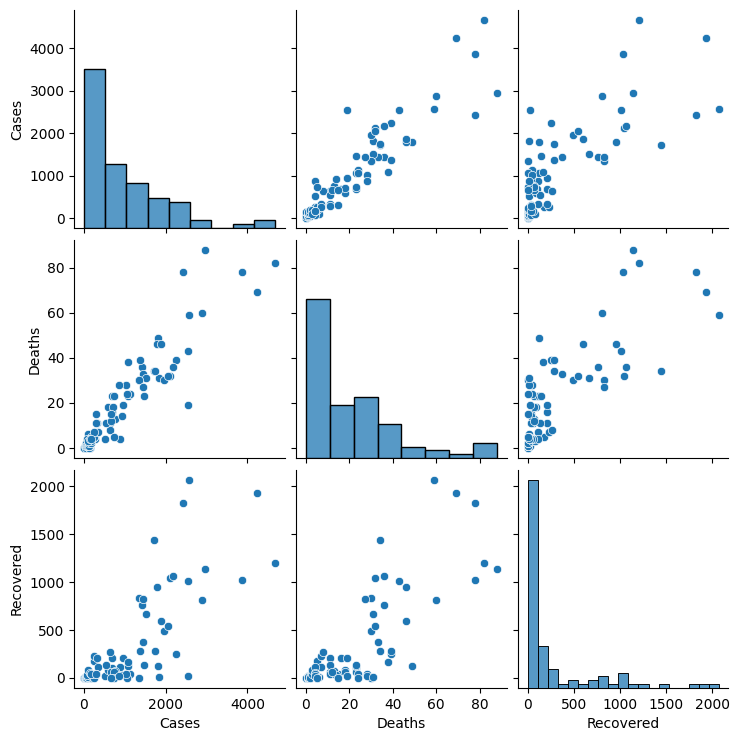

In [35]:
sns.pairplot(df_cdr_date[['Cases', 'Deaths', 'Recovered']])

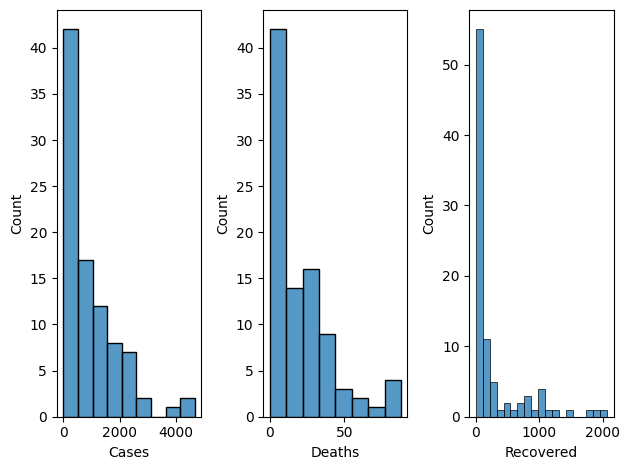

In [36]:
fig, axes = plt.subplots(1, 3)

sns.histplot(ax=axes[0], x=df_cdr_date['Cases'])
sns.histplot(ax=axes[1], x=df_cdr_date['Deaths'])
sns.histplot(ax=axes[2], x=df_cdr_date['Recovered'])
# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Linear Regression

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
ols_formula = 'Deaths ~ Cases'

Ols = ols(formula=ols_formula, data=df_cdr_date)

model = Ols.fit()

model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     573.1
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.49e-40
Time:                        18:21:52   Log-Likelihood:                -315.17
No. Observations:                  91   AIC:                             634.3
Df Residuals:                      89   BIC:                             639.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1335      1.108      1.023      0.309      -1.067       3.334
Cases          0.0194      0.001     23.939      0.000       0.018       0.021
==============================================================================
Omnibus:                       24.760   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.057
Skew:                           0.549   Prob(JB):                     4.71e-30
Kurtosis:                       8.866   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

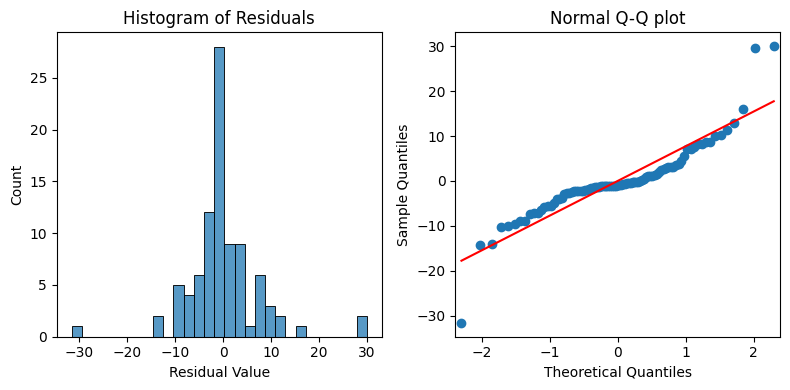

In [39]:
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])

axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

axes[1].set_title("Normal Q-Q plot")

plt.tight_layout()

plt.show()

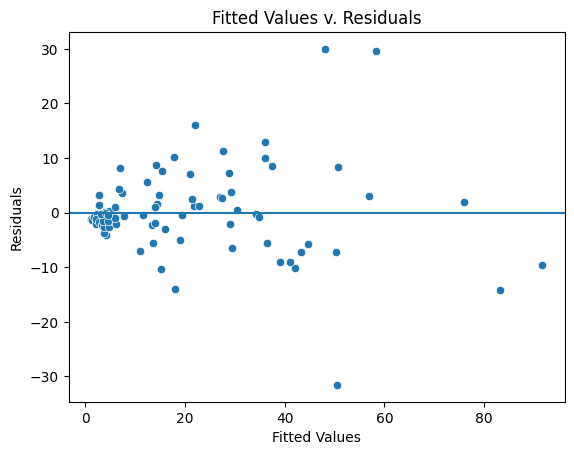

In [40]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")

fig.set_ylabel("Residuals")

fig.set_title("Fitted Values v. Residuals")

fig.axhline(0)

plt.show()

In [52]:
dict_cases = {'Cases': [100, 200, 300, 400, 500, 1000, 3000, 5000, 10000, 30000, 50000, 100000, 300000, 500000]}
linear_results = pd.DataFrame(model.predict(exog=dict_cases), columns=['Deaths'])
linear_results['Cases'] = dict_cases['Cases']
linear_results

,Deaths,Cases
0,3.068611,100
1,5.003692,200
2,6.938773,300
3,8.873854,400
4,10.808935,500
5,20.484339,1000
6,59.185959,3000
7,97.887578,5000
8,194.641627,10000
9,581.657822,30000


In [43]:
df_sample = df_cdr_date[(df_cdr_date['Cases'] >= 3000) & (df_cdr_date['Cases'] <= 5000)]
print(df_sample)
df_sample['Deaths'].describe()

         Date  Cases  Deaths  Recovered
88 2020-06-01   3872      78       1027
89 2020-06-02   4242      69       1931
90 2020-06-03   4677      82       1205


count     3.000000
mean     76.333333
std       6.658328
min      69.000000
25%      73.500000
50%      78.000000
75%      80.000000
max      82.000000
Name: Deaths, dtype: float64

<Axes: xlabel='Date', ylabel='Recovered'>

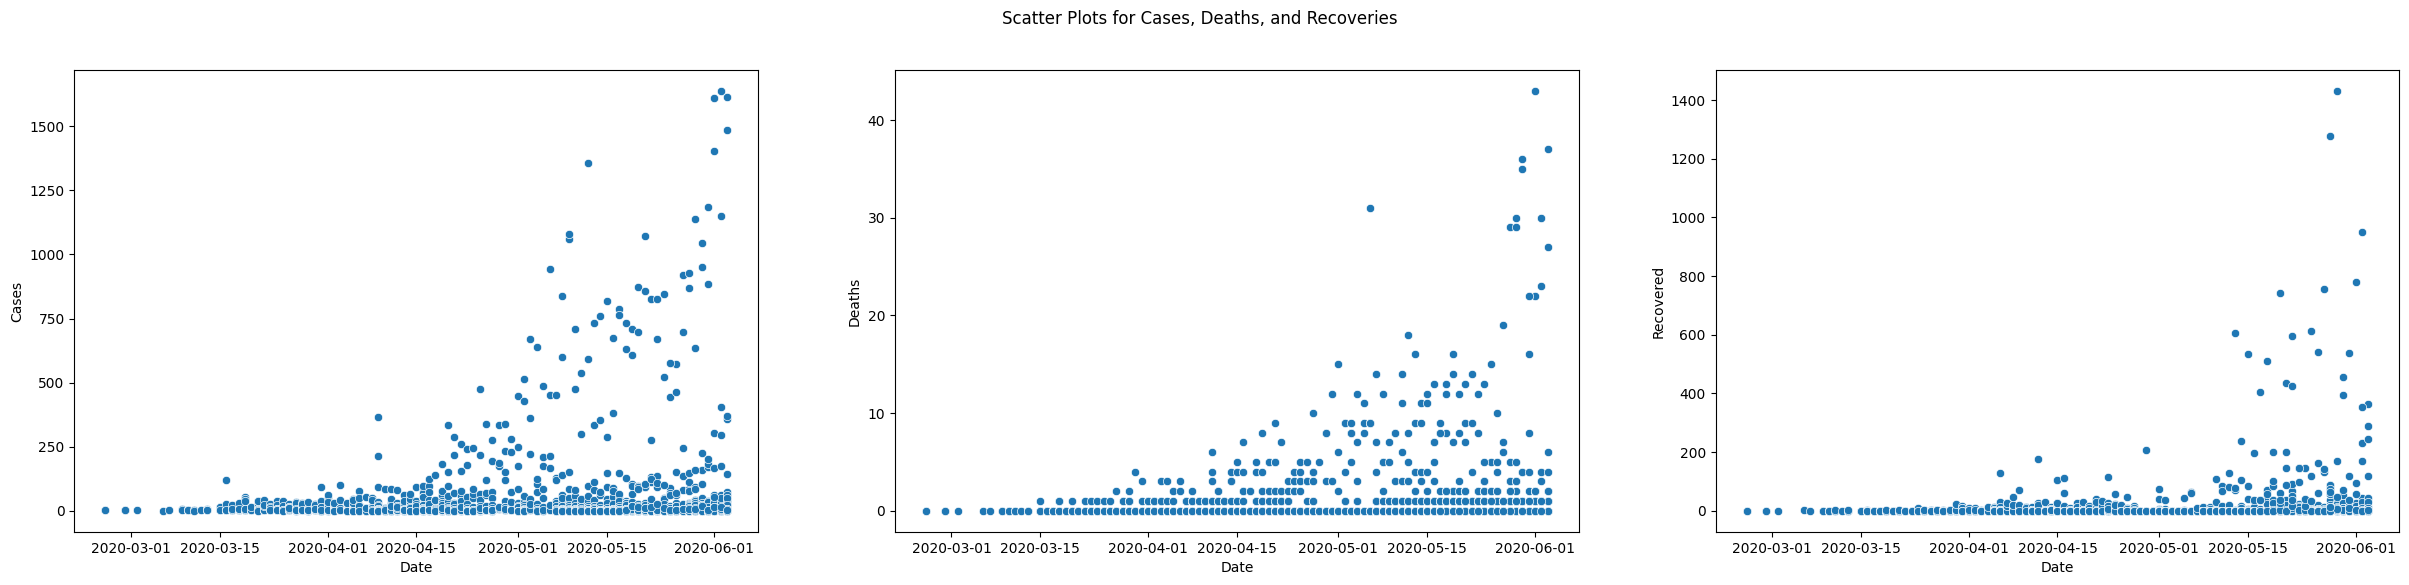

In [44]:
fig,axes = plt.subplots(1, 3, figsize=(30, 6))
fig.suptitle("Scatter Plots for Cases, Deaths, and Recoveries")

sns.scatterplot(ax=axes[0], data=df, y='Cases', x='Date')
sns.scatterplot(ax=axes[1], data=df, y='Deaths', x='Date')
sns.scatterplot(ax=axes[2], data=df, y='Recovered', x='Date')